In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Carregar o dataset

df_casa = pd.read_csv("datasets/kc_house_data.csv")

In [4]:
df_casa.drop(["id", "date", "sqft_above","sqft_basement", "yr_built", "yr_renovated",	"zipcode",	"lat", "long",	"sqft_living15",	"sqft_lot15", "waterfront", "view", "condition", "grade"], axis=1, inplace=True)

In [5]:
df_casa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   sqft_lot     21613 non-null  int64  
 5   floors       21613 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 1013.2 KB


In [21]:
df_casa.describe()

,preco,banheiros,quartos,areaHabitavel,tamanhoTerreno,andares
count,1.715900e+04,17159.000000,17159.000000,17159.000000,17159.000000,17159.000000
mean,4.539720e+05,3.320065,1.693106,1923.392913,7336.885133,1.440643
std,1.981737e+05,0.816337,0.654674,733.049691,3544.982047,0.555535
min,7.800000e+04,2.000000,0.000000,440.000000,572.000000,1.000000
25%,3.050000e+05,3.000000,1.000000,1370.000000,4950.000000,1.000000
50%,4.160000e+05,3.000000,2.000000,1810.000000,7203.000000,1.000000
75%,5.600000e+05,4.000000,2.000000,2370.000000,9334.000000,2.000000
max,1.127000e+06,6.000000,5.000000,7350.000000,19141.000000,3.000000


In [7]:
df_casa.columns = ["preco", "banheiros", "quartos", "areaHabitavel", "tamanhoTerreno", "andares"]

## AED

<Axes: ylabel='preco'>

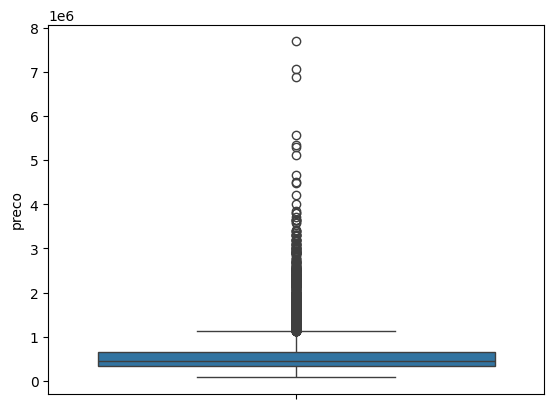

In [8]:
# Verificação de outliers

sns.boxplot(df_casa, y="preco")

<Axes: ylabel='banheiros'>

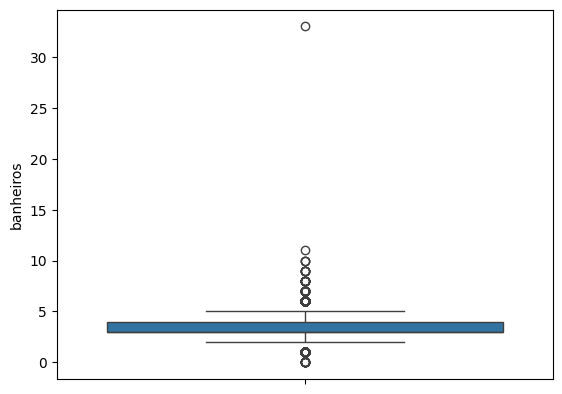

In [9]:
sns.boxplot(df_casa, y="banheiros")

<Axes: ylabel='quartos'>

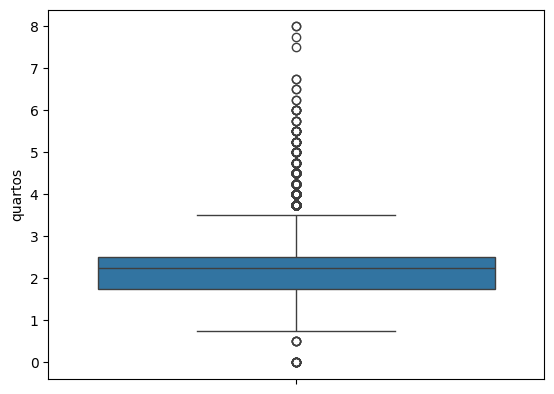

In [10]:
sns.boxplot(df_casa, y="quartos")

<Axes: ylabel='areaHabitavel'>

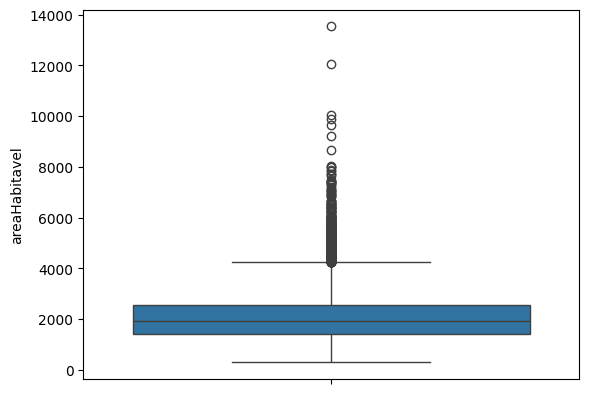

In [11]:
sns.boxplot(df_casa, y="areaHabitavel")

<Axes: ylabel='tamanhoTerreno'>

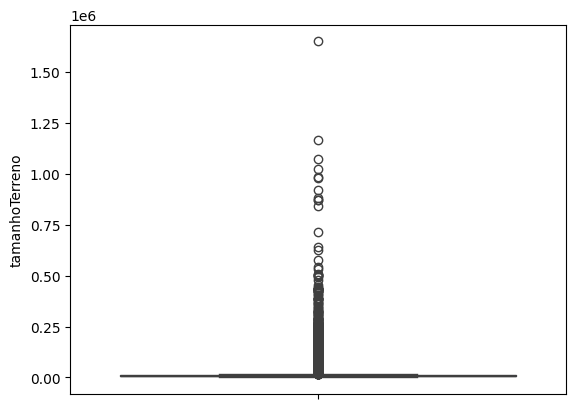

In [12]:
sns.boxplot(df_casa, y="tamanhoTerreno")


<Axes: ylabel='andares'>

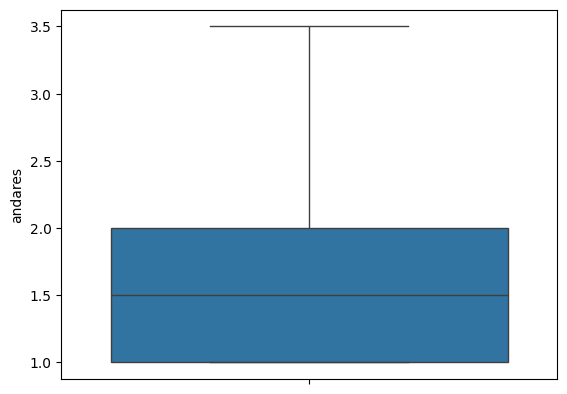

In [13]:
sns.boxplot(df_casa, y="andares")

In [14]:
# Transformação de variáveis de decimais para inteiros
df_casa.quartos = df_casa.quartos.astype(int)
df_casa.andares = df_casa.andares.astype(int)

In [15]:
# Estabelecimento do quartis para a exclusão de outliers

Q1_preco = df_casa.preco.quantile(0.25)
Q3_preco = df_casa.preco.quantile(0.75)

limiteSuperior_preco = Q3_preco + 1.5*(Q3_preco-Q1_preco)
Q1_terreno = df_casa.tamanhoTerreno.quantile(0.25)
Q3_terreno = df_casa.tamanhoTerreno.quantile(0.75)

limiteSuperior_terreno = Q3_terreno + 1.5*(Q3_terreno-Q1_terreno)
limiteSuperior_terreno

np.float64(19160.0)

In [16]:
# Exclusão de prováveis outliers
df_casa.drop(df_casa[(df_casa.preco > limiteSuperior_preco)].index, inplace=True)
df_casa.drop(df_casa[(df_casa.tamanhoTerreno > limiteSuperior_terreno)].index, inplace=True)
df_casa.drop(df_casa[(df_casa.banheiros > 6) | (df_casa.banheiros < 2)].index, inplace=True)
df_casa.drop(df_casa[(df_casa.banheiros == 6) & (df_casa.quartos <3)].index, inplace=True)
df_casa.drop(df_casa[(df_casa.preco > 6.430000e+05) & (df_casa.quartos <2) & (df_casa.areaHabitavel < 2550.000000)].index, inplace=True)
df_casa.drop(df_casa[(df_casa.preco > 6.430000e+05) & (df_casa.areaHabitavel < 1920.000000) &(df_casa.quartos <4)].index, inplace=True)
df_casa[(df_casa.tamanhoTerreno > limiteSuperior_terreno)]

,preco,banheiros,quartos,areaHabitavel,tamanhoTerreno,andares


<Axes: xlabel='preco', ylabel='areaHabitavel'>

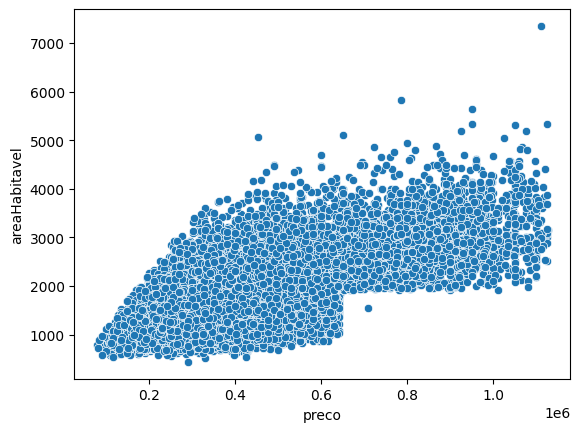

In [17]:
# Cruzamento de variáveis numéricas

sns.scatterplot(df_casa, x="preco", y="areaHabitavel")

<Axes: xlabel='preco', ylabel='tamanhoTerreno'>

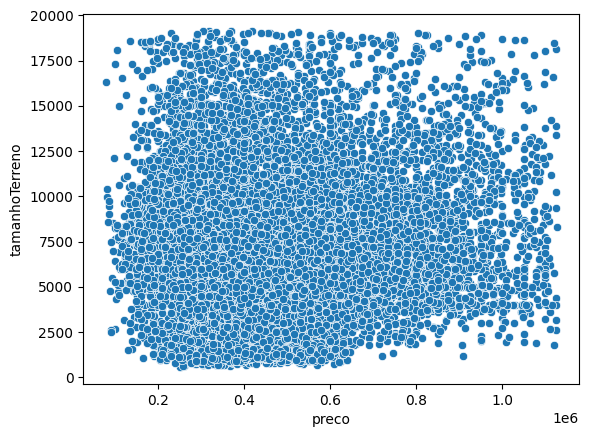

In [18]:
sns.scatterplot(df_casa, x="preco", y="tamanhoTerreno")

<Axes: xlabel='andares', ylabel='preco'>

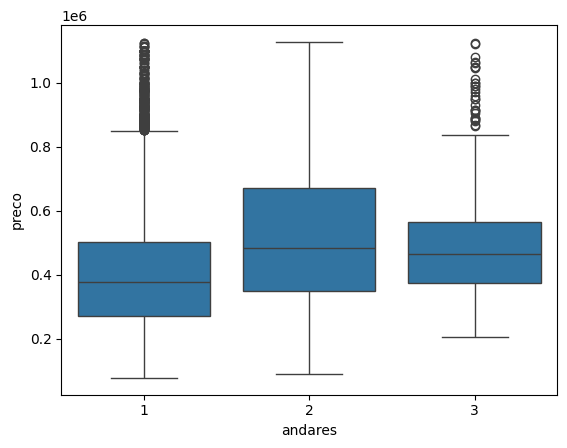

In [28]:
sns.boxplot(df_casa, y="preco", x="andares")

<Axes: xlabel='banheiros', ylabel='preco'>

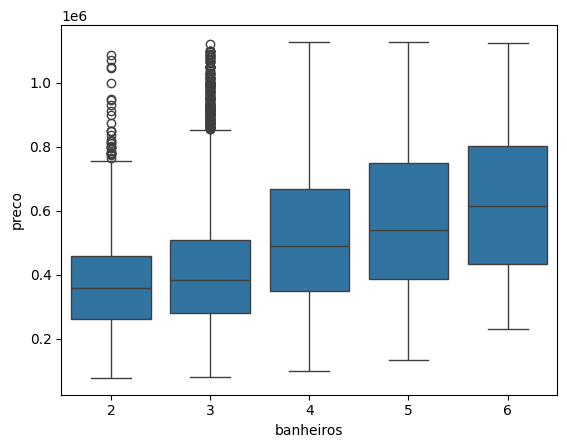

In [29]:
sns.boxplot(df_casa, y="preco", x="banheiros")

<Axes: xlabel='quartos', ylabel='preco'>

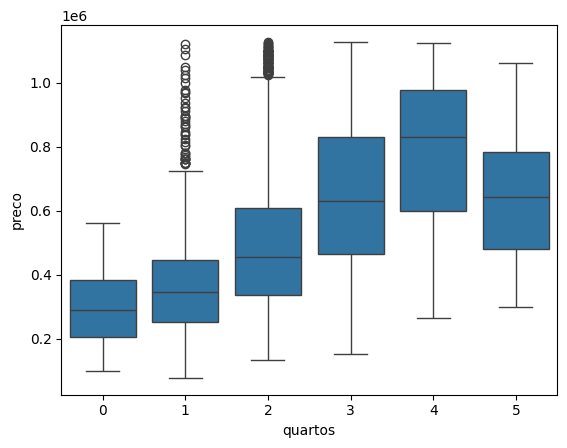

In [27]:
sns.boxplot(df_casa, y="preco", x="quartos")

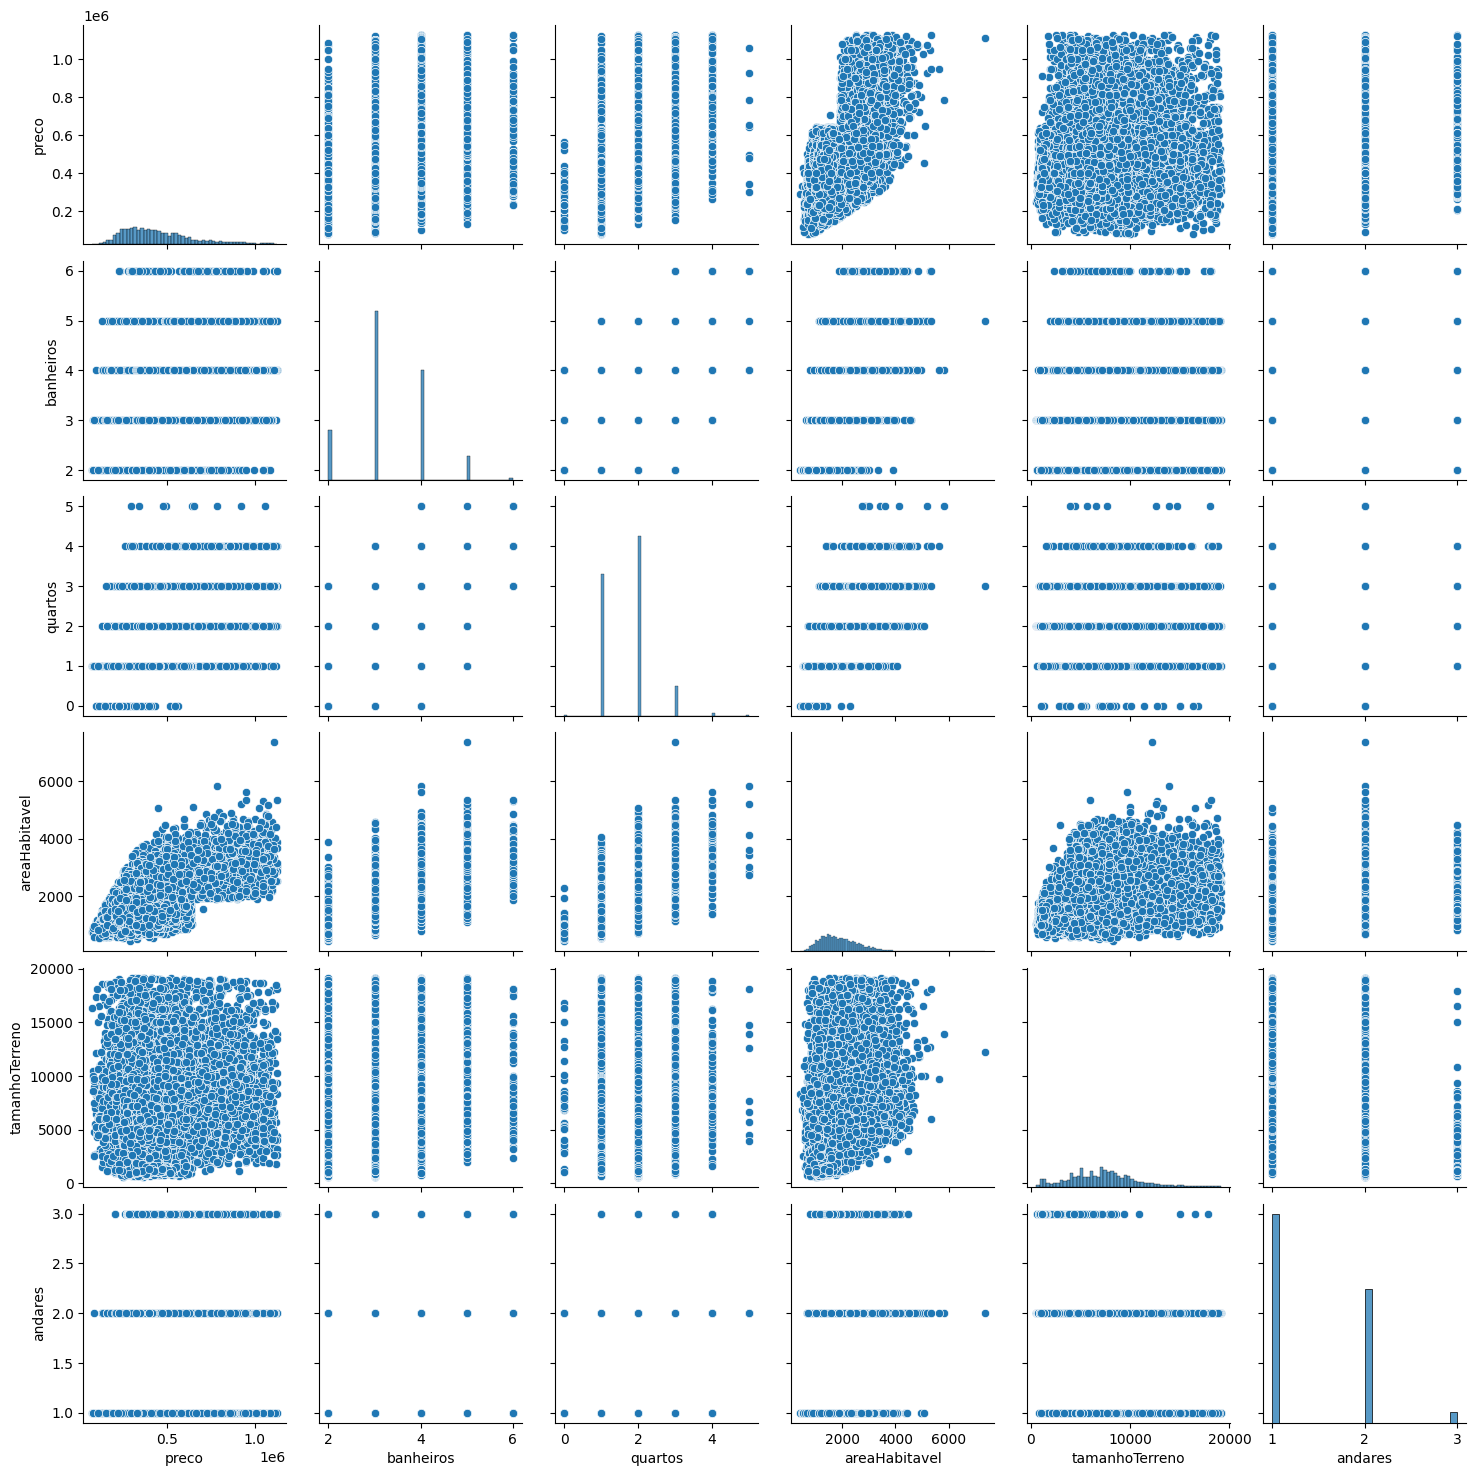

In [19]:
sns.pairplot(df_casa)

## Analise de correlação

<Axes: >

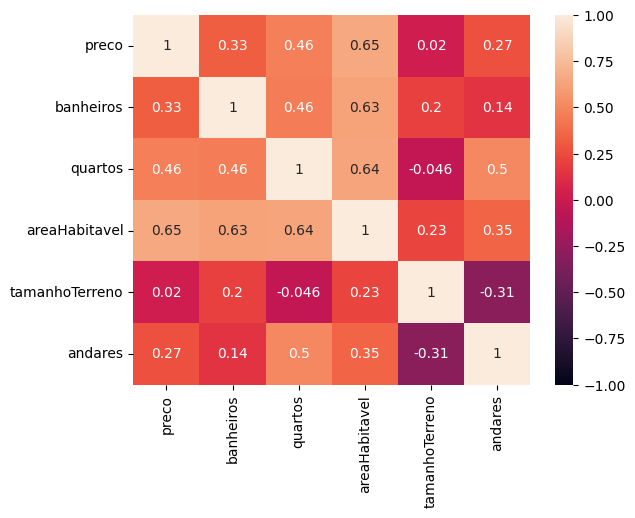

In [20]:
sns.heatmap(df_casa.corr(), vmin=-1, vmax=1, annot=True)

## Treinamento de modelo linear 

In [34]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

import numpy as np

In [31]:
# Criar um Dataset de treino e teste

X = df_casa.drop("preco", axis=1)
y = df_casa["preco"]

In [35]:
# Split usando KFold com 5 splits

kf = KFold(n_splits=5, shuffle=True, random_state=51)
kf

KFold(n_splits=5, random_state=51, shuffle=True)

In [36]:
# Pipeline
# Padronizar variáveis numéricas

# Nomes das colunas
colunas_numericas = ['banheiros', 'quartos', 'andares', 'areaHabitavel', 'tamanhoTerreno']

# Transfornmer para colunas numericas
# A transformação realizada pelo StandardScaler é linear, ou seja, ela apenas "redimensiona" os dados sem alterar a relação entre eles
tranformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Criar um ColumnTransformer
preprocessor = ColumnTransformer(
    tranformer=[
        ('num', tranformer, colunas_numericas)
    ]
)

# Criando o Pipeline principal = Pré-processamento + Treinamento
model_regr = Pipeline(('preprocessor', preprocessor), ('regressor', LinearRegression()))